# Capstone Project 2 - Milestone Report

## Title: Yelp business insights and hybrid restaurant recommender system

## Abstract
Yelp open dataset is obtained, cleaned and analyzed in this project. The key findings are: 
* Only a subset of Yelp restaurants from a few selected states are available in this dataset. Among them, only Arizona, Nevada, Ohio, North Carolina and Pennsylvania have a rich catalog of over 5000 restaurants. 
* The most common restaurants are the popular chain or franchised restaurants, fast food or coffee shops, Starbucks, McDonald's and Subway being the top three among all.
* The average restaurant rating is around 3.5 and is similar among various locations, with 3.5 and 4.0 being the most common ratings. Half of the restaunrants have less than 30 reviews, but restaurants from Nevada (Las Vegas) have significant more reviews than others. The correlation between rating and review suggests that restaurants with more reviews tend to have higher ratings on average.
* Most restaurants are in the low (40.9%) and mid (41.6%) price ranges. More expensive restaurants tend to receive more reviews on average, but the average rating remains similar.
* The most popular cuisine of restaurants overall is American style (traditional and new), followed by Mexican, Italian and Chinese, whereas the most popular restaurant setting is the formal restaurant style, followed by the nightlife/bar style and fast food. The above preference of cuisine varies quite a bit by location.
* A steady increase of new users has continued since Yelp's debut in 2004 till 2015, followed by a significant decline thereafter. The average rating given by Yelp users is 3.72, and 60% of the users have less than 10 reviews in total, suggesting that most users post reviews on Yelp only occationally.
* The daily number of reviews posted on Yelp shows a steady upward trend with seasonal fluctuations, whereas the daily number of tips only increased in the first four years and slowly dived down thereafter, suggesting tip is not as popular as review. Two thirds of restaurant reviews on Yelp are associated with a positive star rating of 4+. 
* Half of the restaurants have less than 20 checkins, indicating that checkin is not a widely used feature on Yelp when compared with review.

## 1. Introduction

### 1.1 Problem

<p>Nowadays recommender systems are everywhere. Almost every major tech company has applied them in some form or another: Amazon uses it to suggest products to customers, and YouTube uses it to decide which video to play next on autoplay. In fact, one fundamental driver of data science’s skyrocketing popularity is the overwhelming amount of information available for anyone trying to make a good decision, and a recommender system helps to filter vast amount of information and make suggestions according to individual’s preference.</p> 

<p>Yelp is one of those companies whose business success relies heavily on the power of its recommender system. It provides users coming to their website or app with quick suggestions of nearby businesses or a list of suggestions for businesses matching users’ search keywords and location. While yelp provides ratings for each business, these are not always indicative of a restaurant’s quality. For instance, a restaurant with only one rating of 5-stars would be ranked higher than a restaurant with a hundred ratings averaging 4.8 stars. Other problems include that the star rating varies from person to person, and the older ratings are less relevant. Improvements are needed to provide better ratings and suggestions.</p>

<p>In this project, a hybrid recommender system will be developed featuring following capabilities: 1) for new or anonymous users, the recommendation engine can provide base-case recommendations using location information and/or other keywords. 2) with user ID as input and user’s interactive feedback, either the collaborative filtering or the content-based filtering will be used to provide personalized recommendations from user’s activity history. 3) smart weighted ratings will be computed taking into consideration the total number of ratings and the irrelevance of outdated ratings etc.</p>

### 1.2 Approach

**Data wrangling:**<br> 
first import from json into Pandas dataframe and unpack nested dictionaries if present, followed by the necessary cleanup.<br> 

**EDA:** <br> 
Understand business and user patterns: for instance, popular restaurant cuisines by locations, popular restaurant styles by location, highly rated restaurants by cost, correlation between ratings and reviews, etc. These understanding will also help in designing the recommendation engine. <br>

**Interactive data visualizations:**<br>
Interactive data visualizations are created using bokeh based on EDA findings.<br>

**Recommender system:**<br>
* Module 1 - simple recommender:<br>
build keyword search-based restaurant recommender module to filter by keyword. Keywords could include, for instance, location-based information (zip code, longitude, latitude)  and restaurant feature-based information (cuisine). 
The restaurant inventory will be filtered by keywords first, then ranked by its average rating or weighted smart rating taking into consideration the popularity (depending on user’s choice). The top-k restaurants from the list will be returned as the top-k recommendations.<br>
* Module 2 - content filtering recommender:<br>
With user ID and restaurant’s metadata, build a content based filtering recommender module that recommends restaurants that are similar to user’s preference inferred from user’s past ratings. More specifically, pairwise similarity scores will be computed for restaurants based on their vectorized feature representation extracted using CountVectorizer or TfidfVectorizer and recommend restaurants based on rankings of the weighted similarity score (e.g. cosine similarity). The important restaurant metadata to consider include categories, attributes, location.<br>
* Module 3 - collaborative filtering recommender:<br>
With user x restaurant rating matrix, build a collaborative filtering recommender module. Remember that the dataset has a total of 1,518,169 users, 188,593 businesses, 5,996,996 reviews and 1,185,348 tip. In terms of the user x business matrix, the matrix is very sparse (0.003% non-empty). Therefore, matrix factorization using ALS (alternative least square) will be used to complete the matrix and generate recommendations.<br>
* Metrics chosen for evaluating and optimizing the ‘goodness’ of the algorithms:<br>
a) measure prediction accuracy: RMSE(root mean squared error)
b) measure ranking effectiveness: 
MAP (mean average precision)
NDCG(Normalized Discounted Cumulative Gain)<br>
* Integration - combine the above modules to build a hybrid recommendation engine:<br>
To combine the above modules, a few simple interactive questions will be added:<br>
a) “Want customized recommendations based on your user history by providing your user ID?”  If no, activate the simple recommender module to provide base-case recommendations using location information and/or optional keywords<br>
b) If yes, prompt to ask follow up question: “do you want to try something new based on people like you?” If yes, activate the collaborative filtering module to recommend new restaurants based on similar peers; otherwise, use content filter module to recommend similar restaurants. <br>
* Other improvements:<br>
Optimize restaurant ranking by weighting the average rating based on total number of ratings (popularity), weighting the individual rating according to their recency, etc. With a quick interactive question: “want smart rating instead?” The alternative restaurant ranking method based on the above weighted scores will be activated and used instead of the simple average rating.<br>
* Potential caveats - cold start problem:<br>
a) new restaurant → content-based recommendation module will be able to use the features (metadata) of the new restaurant and include it when generating recommendations.<br>
b) new user → will be treated as if the user ID is not available (both has no user history) and similar recommender module will be used to recommend restaurants based on location, keywords, popularity, etc. 


### 1.3 Impact

<p>The hybrid recommender system can be beneficial both to Yelp and to Yelp users. Yelp constantly looks for means to improve its recommendation systems and better make use of its rich business data. Having recommendations available for all levels of interaction, the hybrid recommender system will improve user experience and engagement by providing both quick suggestions for casual users and more sophisticated personalized recommendations for frequent users. The improved weighted rating metric will better represent restaurant quality, resulting in more accurate ranking for restaurants of interest. On the other hand, Yelp users will benefit from the various levels of interactions and personalized recommendations. </p>

### 1.4 Dataset
The Yelp dataset is available to the public via Yelp Dataset Challenge. The dataset is available for download upon signing up at https://www.yelp.com/dataset. The raw data is structured as five individual JSON files contains a total of 5,996,996 reviews, 1,518,169 users, 188,593 businesses, 1,185,348 tips, and over 1.4 million business attributes for each of the 188,593 businesses.

## 2. Data Acquisition & Wrangling

* **Raw data:** <br>
The Yelp dataset is downloaded as five individual json files from Yelp at https://www.yelp.com/dataset. The dataset contains a total of 5,996,996 reviews, 1,518,169 users, 188,593 businesses, 1,185,348 tips, and over 1.4 million business attributes for each of the 188,593 businesses. The total size of the dataset is more than 7 Gb. Summary information of the five JSON files are shown below:
<img src="figures/dataset_info_from_yelp.png">

* **Convert to CSV files while unpacking nested dictionaries:** <br>
The raw json files are downloaded as they are ('business.json','user.json','review.json','tip.json','checkin.json'). Then a python script ('json_to_csv.py'), available at https://github.com/jingzhaomirror/Springboard_capstone_2/blob/master/json_to_csv.py), is used to convert all the raw json files to csv files of the same name. Nested json dictionaries are flatterned during this conversion and both parent and nested key, value pairs are extracted.

* **Cleanup:** <br>
All five csv files are imported as Pandas dataframes, inspected and cleaned up accordingly. 


* **More information on data wrangling:** <br>
https://github.com/jingzhaomirror/Springboard_capstone_2/blob/master/data_wrangling.ipynb

### 2.1 Data acquisition and conversion

In [1]:
# run 'json_to_csv.py' script to convert all json files into csv files of the same name
# nested dictionaries is flatterned during the conversion and both parent and nested key, value pairs are extracted

%run -i 'json_to_csv.py' 'dataset/business.json'
%run -i 'json_to_csv.py' 'dataset/user.json'
%run -i 'json_to_csv.py' 'dataset/review.json'
%run -i 'json_to_csv.py' 'dataset/tip.json'
%run -i 'json_to_csv.py' 'dataset/checkin.json'

In [45]:
# ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# import all five csv files as Pandas dataframe
business = pd.read_csv('dataset/business.csv')  # contains business data including location data, attributes and categories
user = pd.read_csv('dataset/user.csv') # contains users data including the user's friend mapping and all the metadata associated with the user
review = pd.read_csv('dataset/review.csv') # contains full review text data including the user_id that wrote the review and the business_id the review is written for
tip = pd.read_csv('dataset/tip.csv') # tips written by a user on a business, tips are shorter than reviews and tend to convey quick suggestions
checkin = pd.read_csv('dataset/checkin.csv') # checkins on a business

### 2.2 Cleanup

#### 2.2.1 dataframe 'business'
The 'business' dataframe contains a total of 188,593 businesses all over the world with a primary focus on US businesses. Business categories include a wide variaty of 1264 keywords, many of which are not restaurant-related, for instance, 'shopping', 'health & medical', 'automotive', etc. 

For this project (Yelp restaurant recommender), the scope is limited to US restaurants. Therefore, the 'business' dataframe is first filtered to US business only (138,757 businesses, reduced by 26%), then to restaurant-related business only (47,554 businesses, reduced by 66%).

In [3]:
# filter to US business only by:

# 1. filter by postal_code following the American 5-digit zip code format
ziplen = business.postal_code.astype(str).apply(len) # drop entries where postal_code is not 5-digit from business
business = business[ziplen == 5]

# 2. filter by state abbreviation
list_of_states = ['AL','AK','AR','AS','AZ','CA','CO','CT','DC','DE','FL','FM','GA','GU','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MH','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','MP','OH','OK','OR','PA','PR','PW','RI','SC','SD','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY']
business = business[business.state.isin(list_of_states)]

In [4]:
# deal with missing city information
business.loc[58688,'city'] = 'Yuma' # add missing city info
business.loc[111036,'city'] = 'Raleigh' # add missing city info

# remove one entry with missing latitude information
business = business[business.latitude.notnull()]

In [5]:
# remove business types other than restaurants

def rmv_non_restaurant_busi(df, yes=[], no=[]): 
    
    """
    remove businesses other than restaurants based on the information provided under business 'categories'
    ---
    input:
    1. df: dataframe to be cleaned up
    2. yes: additional list of strings for identifying restaurants
    3. no: additional list of strings for identifying non-restaurant busineses
    note: 'yes' and 'no' are optional, if provided, an union of the default set and the provided list will be computed and used. 
    ---
    output:
    cleaned up dataframe containing only restaurant-based businesses
    """

    yes = set(['fast food','sandwiches','caterers','deserts','burgers']).union(set(yes))
    no = set(['shopping','home services','beauty & spas','hair salons','health & medical', 'local services','automotive',
              'fitness & instruction','transportation','airlines','pets','active life','professional services','banks & credit unions'
             'insurance','financial services','education','public services & government','session photography','car rental',
             'photographers','churches','religious organizations','tours','doctors','massage','pharmacy','drugstores']).union(set(no))
    
    idx_to_drop = []
    for idx, row in df.iterrows():
        if row['categories'] is not np.nan: 
            entries = row['categories'].split(',')
            for entry in entries:
                entry = entry.strip().lower()
                if entry in yes: 
                    break
                if entry in no:
                    idx_to_drop.append(idx)
                    break
        elif row['attributes.HairSpecializesIn'] is not np.nan:  # if 'categories' is not available, use 'attributes' to filter
            idx_to_drop.append(idx) 
                    
    return df.drop(index=idx_to_drop)

business = rmv_non_restaurant_busi(business)

In [6]:
business.reset_index(drop=True, inplace=True) # update index

#### 2.2.2 dataframe 'user'
The 'user' dataframe contains a total of 1,518,169 users, with only a few NaNs (0.03%) in the 'name' column and no NaNs in other columns. Since 'user_id' functions as the unique identifier for identifying users and cross-referencing to other dataframes, missing information in the 'name' column is not a problem.<br>
Action is taken to remove one outlier (value of 0.0) in the 'average_stars' column, as 'average_stars' should take any float number between 1.00 and 5.00.

In [7]:
# remove the one entry having the average_stars of 0.0
user = user[user.average_stars != 0]
user.reset_index(inplace=True, drop=True)

#### 2.2.3 dataframe 'review'
The 'review' dataframe contains a total of 5,996,996 reviews. There are only two problematic entries with incorrect and missing information: <br>
1) one entry has a value of 0 in the 'stars' column, which should only take on discrete values of 1, 2, 3, 4 or 5. 
This entry is removed since the actual review in the 'text' column is also missing.<br>
2) one entry has values of -1 in the columns of 'useful' and 'cool'. Since these two columns should only take binary values of 0 or 1, the values have been updated <br>

In addition, the 'text' column containing the actual contents of the reviews has been updated to 'string' data type. The carriage-return '\r' is present in a few reviews, causing undesired creation of new rows when writing to and importing from csv files. Therefore, '\r' is replaced with '\n\n'.

In [8]:
# remove the one entry with star rating of 0 under 'star' column and no actual review ('nan' under 'text' column)
review = review[review.stars != 0]

# correct the values under columns 'useful' and 'cool' for review_id 3445401 from -1 to 0, since values should be non-negative
review.loc[3445401, ['cool','useful']] = 0

# convert all values in the 'text' column to string type
review['text'] = review.text.astype(str)

# replace the '\r' with '\n\n' in a few reviews to avoid problems when writing to and importing from csv files
review.loc[3009218,'text']=repr(review.loc[3009218,'text']).replace('\r','\n\n')
review.loc[5507254,'text']=repr(review.loc[5507254,'text']).replace('\r','\n\n')

review.reset_index(inplace=True, drop=True) # update index

#### 2.2.4 dataframe 'tip'
The 'tip' dataframe contains a total of 1,185,348 tips, four (0.0003%) out of which having no actual tip contents and are removed. 

In [9]:
# drop entries with 'NaN' under 'text' column
tip = tip[tip.text.notnull()]
tip.reset_index(inplace=True, drop=True)

#### 2.2.5 dataframe 'checkin'
The 'checkin' dataframe contains 157,075 checkin logs associated with 157,075 different businesses. Each entry represents the checkin information for one business, with the checkin counts for particular hours in the different days of the week. A column named 'total_count' is computed and introduced by adding up all checkins at all times. 

In [10]:
# sort the columns by column names
ordered_names = sorted(checkin.columns)
checkin = checkin[ordered_names]
print(checkin.columns)

# add a new column named 'total_count' containing the sum of all checkins at all times (sum of all values under the nested columns with names starting with 'time.')
checkin['total_count'] = checkin.loc[:,'time.Fri-0':'time.Wed-9'].sum(axis=1).astype(int)

Index(['business_id', 'time', 'time.Fri-0', 'time.Fri-1', 'time.Fri-10',
       'time.Fri-11', 'time.Fri-12', 'time.Fri-13', 'time.Fri-14',
       'time.Fri-15',
       ...
       'time.Wed-21', 'time.Wed-22', 'time.Wed-23', 'time.Wed-3', 'time.Wed-4',
       'time.Wed-5', 'time.Wed-6', 'time.Wed-7', 'time.Wed-8', 'time.Wed-9'],
      dtype='object', length=170)


### 2.3 Cleaned datasets
The cleaned dataframes are saved as five separate csv files, 'business_clean.csv', 'user_clean.csv', 'review_clean.csv', 'tip_clean.csv' and 'checkin_clean.csv'.

In [11]:
# output cleaned dataframes to csv files
business.to_csv(path_or_buf='business_clean.csv',index=False)
user.to_csv(path_or_buf='user_clean.csv',index=False)
review.to_csv(path_or_buf='review_clean.csv',index=False)
tip.to_csv(path_or_buf='tip_clean.csv',index=False)
checkin.to_csv(path_or_buf='checkin_clean.csv',index=False)

#### A short description of each dataframe is given as below:

---
* **'business':**<br>
('business' also contains columns resulting from unpacking nested dictionaries under the 'attributes' and 'hours' columns, those 'child' columns feature column names starting with either 'attributes.' or 'hours.'. Below is a summary of only the 'parent' columns) <br>
1) business_id: no NaN, no dulicates, all business_ids are of the same length of 22 characters, and are case-sensitive.<br>
2) name: no NaN.<br>
3) address: there are 1.9% NaNs, but it's ok since postal_code and coordinates are used mostly instead of address<br>
4) postal_code: no NaN, following the American 5-digit zipcode format.<br>
5) city, 6) state, 7) latitude and 8) longitude: no NaN.<br>
9) stars: no NaN, all star ratings take values from 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5 and 5.0.<br>
10) review_count: no NaN, review counts range between 3 and 7968.<br>
11) is_open: no NaN, integer taking values of 0 or 1 for closed (27.3%) or open (72.7%), respectively<br>
12) neighborhood: significant NaNs (66.7%), the top 5 neighborhoods are 'Westside','Southeast','Spring Valley','The Strip','downtown'. The neighborhood information will not be used as location information. Instead, it will be treated as one of the business features for NLP analysis.<br>
13) attributes: some NaNs (3.9%), all with subattributes shown under column names featuring 'attributes.'<br>
    -most subattributes are categorical with either True or False binary entries or a few categorical values;<br>
    -six subattributes (e.g. 'attributes.businessParking') still contain nested dictionaries;<br>
14) categories: a few NaNs (0.9%), string values contains comma separated phrases describing restaurant cuisines or styles, e.g. 'burger'.<br>
15) hours: many NaNs (26.8%), all with subfeatures shown under columns names featuring 'hours.' <br>
    -all subfeatures are day of the week from 'Monday' to 'Sunday', with string values indicating the operating hours<br>

---
* **'user':**<br>
1) user_id: no NaN, no duplicates, similar to business_id, all user_ids are of the same length of 22 characters, and are case-sensitive.<br>
2) name: a few NaNs (0.03%). User_id will be used instead of name in all cases.<br>
3) elite: no NaNs, contains a list of the years the user was an elite member (very active Yelp users with frequent activities and many insightful reviews & tips). Most users (95.6%) has 'None' as the value.<br>
4) yelping_since: no NaN, string formatted as YYYY-MM-DD, ranging between 2004-10-12 and 2018-07-02, indicating the date user joined Yelp.<br>
5) review_count: no NaN, integer value indicating the number of reviews the user has written, value ranges between 0 and 12723.<br>
6) average_stars: no NaN, takes any float number between 1.00 and 5.00.<br>
7) useful: no NaN, integer indicates the number of useful votes sent by the user. Value ranges between 0 and 258479,with 0 being the most common value.<br>
8) funny:  no NaN, integer indicates the number of useful votes sent by the user. Value ranges between 0 and 242120,with 0 being the most common value.<br>
9) cool: no NaN, integer indicates the number of useful votes sent by the user. Value ranges between 0 and 255909,with 0 being the most common value.<br>
10) fans: no NaN, integer indiates the number of fans the user has. Value ranges between 0 and 8665, with 0 being the most common value. <br>
11) compliment_*: no NaN, all integers indicating the number of various types of compliments received by the users.<br>

---
* **'review':**<br> 
1) review_id: no NaN, no duplicates, similar to user_id and business_id, all review_ids are of the same length of 22 characters, and are case-sensitive.<br>
2) user_id: no NaN, all of the same length of 22 characters, case-sensitive, corresponding to the user_id in dataframe 'user'.<br>
3) business_id: no NaN, all of the same length of 22 characters, case-sensitive, corresponding to the business_id in dataframe 'business'.<br>
4) stars: no NaN, integer indicating the star rating, takes discrete values of 1, 2, 3, 4 and 5<br>
5) text: no NaN and no empty entries, strings of the actual reviews, with length ranging from 1 to 5000.<br>
5) date: no NaN, string of length 10 formatted as YYYY-MM-DD, dates ranges from 2004-10-12 to 2018-07-02.<br>
6) useful: no NaN, integer, the number of useful votes the review received, values range from 0 to 1234.<br>
7) funny: no NaN, integer, the number of useful votes the review received, values range from 0 to 505.<br>
8) cool: no NaN, integer, the number of useful votes the review received, values range from 0 to 991.<br>

---
* **'tip':** <br>
1) user_id: no NaN, all of the same length of 22 characters, case-sensitive, corresponding to the user_id in dataframe 'user'.<br>
2) business_id: no NaN, all of the same length of 22 characters, case-sensitive, corresponding to the business_id in dataframe 'business'.<br>
3) text: no NaN and no empty entries, strings of the actual tips, with length ranging from 1 to 500.<br>
4) date: no NaN, string value of length 10 formatted as YYYY-MM-DD, dates ranges from 2009-04-15 to 2018-07-02.<br>
5) likes: no NaN, integer value indicating the number of likes the tip received, value ranges from 0 to 15.<br>

---
* **'checkin':** <br>
('checkin' also contains columns resulting from unpacking nested dictionaries under column 'time', those nested columns feature column names starting with 'time.'. Below is a summary of only the parent columns)<br>
1) business_id: no NaN, no duplicates, all business_ids are of the same length of 22 characters, and are case-sensitive.<br>
2) time: no NaN, parent columns with nested dictionaries containing checkin counts (value) under all times (key).<br>
3) total_count: no NaN, integer indicating the sum of all checkins at all times for the business_id, values range from 1 to 138477.<br>

## 3. Exploratory data analysis

In [38]:
# import relevant packages
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Select, Slider
from bokeh.layouts import row, column, widgetbox
from bokeh.palettes import Category20, Spectral4
from bokeh.transform import factor_cmap
output_notebook()

Loading BokehJS ...

### 3.1 Understand business patterns

#### Common restaurants

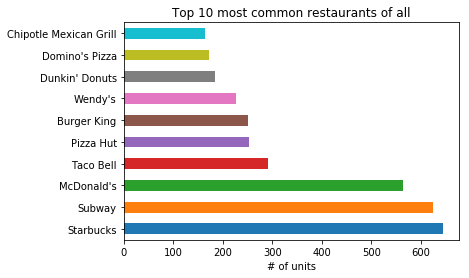

In [13]:
# common restaurants of all
business.name.value_counts()[:10].plot(kind='barh');
plt.xlabel('# of units');
plt.title('Top 10 most common restaurants of all');

In [34]:
# interactive visualization of common restaurants by location

def common_rest_by_state(doc):
    names = list(business.name.value_counts()[:10].index)
    counts = business.name.value_counts()[:10].values
    source_common = ColumnDataSource(data=dict(names = names, counts=counts))
    p_common = figure(height = 350, y_range = names, toolbar_location = None, title='Common restaurants in all states')
    p_common.hbar(y='names', left=0, right='counts', source=source_common, height=0.8, 
                  line_color=None, fill_color=factor_cmap('names', palette=Category20[20], factors=names))
    p_common.ygrid.grid_line_color = None
    p_common.x_range.start = 0
    p_common.xaxis.axis_label = '# of units in all states'

    def callback(attr,old,new):
        val = menu.value
        if val == 'all states': df = business
        else: df = business[business.state == val]
        names = list(df.name.value_counts()[:10].index)
        counts = df.name.value_counts()[:10].values
        source_common.data= dict(names = names, counts = counts)
        p_common.y_range.factors = names  # update range for the categorical y-axis
        p_common.title.text = "Common restaurants in {}".format(val)
        p_common.xaxis.axis_label = "# of units in {}".format(val)
    
    menu = Select(value='all states', options=['all states','AZ','NV','NC','OH','PA'], title='State')
    menu.on_change('value', callback)
    layout = row(p_common, menu)
    doc.add_root(layout)
    
show(common_rest_by_state)

<img src="figures/common_restaurant_bokeh.png">

As expected, the top 10 common restaurants are the popular chain or franchised restaurants, fast food or coffee shops.
Although the ranking varies a bit by state, Starbucks, McDonald's and Subway are the top 3 among all. Some regional restaurant chains show up in the top list only in certain states, for instance, Filibertos, one of the Southwest's favorite Mexican fast food, is ranked # 8 in the state of Arizona. 

#### Restaurant statistics by state

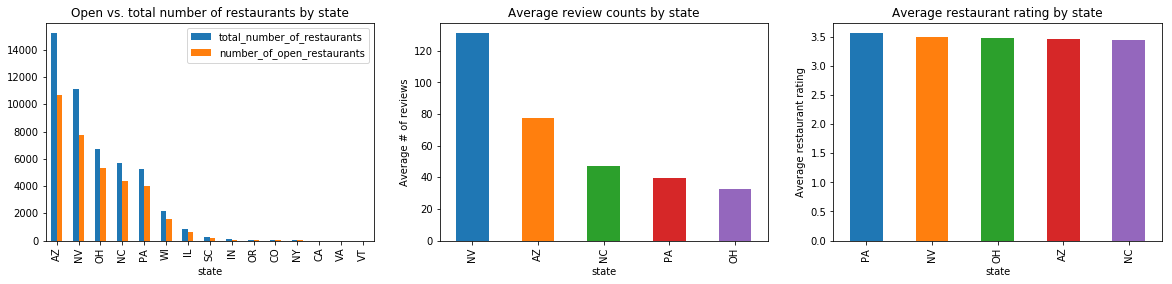

In [15]:
plt.figure(figsize=(20,4))

# total number of restaurants vs open restaurants by state
ax1 = plt.subplot(1,3,1)
open_by_state = business.groupby('state')['is_open'].agg(['count','sum']).sort_values(by=['count'],ascending=False)
open_by_state.columns = ['total_number_of_restaurants','number_of_open_restaurants']
open_by_state.plot(kind='bar',ax=ax1);
ax1.set_title('Open vs. total number of restaurants by state');

# create a groupby object based on the top five states
groupby_5state = business[business.state.isin(['AZ','NV','OH','NC','PA'])].groupby('state')

# average review_count by state for top five states
ax2 = plt.subplot(1,3,2)
groupby_5state['review_count'].mean().sort_values(ascending=False).plot(kind='bar', ax=ax2);
ax2.set_ylabel('Average # of reviews');
ax2.set_title('Average review counts by state');

# average rating by state for top five states
ax3 = plt.subplot(1,3,3)
groupby_5state['stars'].mean().sort_values(ascending=False).plot(kind='bar', ax=ax3);
ax3.set_ylabel('Average restaurant rating');
ax3.set_title('Average restaurant rating by state');

In [35]:
# interactive visualization of restaurant statistics by location

by_state = business.groupby('state') 
states = list(by_state.count().index) # list of states
totals = by_state['business_id'].count() # total number of restaurants by state (including both open and closed)
stars = by_state['stars'].mean() # average of star ratings by state
review_counts = by_state['review_count'].mean() # average number of reviews by state
opens = by_state['is_open'].sum() # number of open restaurants by state

def stats_by_state(doc):
    """ Plot various summary statistics by state using interactive visualization via Bokeh server
    """
    
    source_state = ColumnDataSource(data=dict(states=states, y=totals))
    p_state = figure(x_range=states, plot_height=350, toolbar_location=None, title="# of restaurants (total) by state")
    p_state.vbar(x='states', top='y', bottom=0, width=0.8, source=source_state, 
                 line_color= None, fill_color=factor_cmap('states', palette=Category20[15], factors=states))
    p_state.xgrid.grid_line_color = None
    p_state.y_range.start = 0
    p_state.yaxis.axis_label = '# of restaurants (total)'

    def callback(attr,old,new):
        val = menu.value
        if val == "# of restaurants (total)": y = totals
        elif val == "Average rating": y = stars
        elif val == "Average number of reviews": y = review_counts
        else: y = opens
        source_state.data=dict(states=states, y=y)
        p_state.title.text = "{} by state".format(val)
        p_state.yaxis.axis_label = val
    
    menu = Select(value='# of restaurants (total)', title='Summary statistics', 
                  options=['# of restaurants (total)','Average rating','Average number of reviews','# of restaurants (open)'])
    menu.on_change('value',callback)
    layout = row(p_state, menu)
    doc.add_root(layout)
    
show(stats_by_state)

<img src="figures/restaurant_stats_by_state_bokeh.png">

As shown, this dataset only contains a subset of all yelp businesses, focused on businesses from only a few selected states. In terms of restaurants, only a portion of restaurants from 15 states (Arizona, Nevada, Ohio, North Carolina, Pennsylvania, Wisconsin, Illinois, South Carolina, Indiana, Oregon, Colorado, New York, California, Vermont and Virgina) are available in this dataset. Among them, only Arizona, Nevada, Ohio, North Carolina and Pennsylvania have a rich catalog of over 5000 restaurants, and will be the main focus of this project. 

In terms of review counts, Nevada has a much higher average than all others, as a result of the popularity of Las Vegas as a resort town. The average restaurant rating is very similar among five states, close to 3.5.

In [17]:
# restaurant distribution on map using Bokeh and google map API
api_key = mask # Google map API key

from bokeh.models import GMapOptions
from bokeh.plotting import gmap

map_options = GMapOptions(lat=36.114647, lng=-115.172813, map_type="roadmap", zoom=3)
p = gmap(api_key, map_options, title="Restaurant distribution by location",
        tools="pan,wheel_zoom,reset")         
source = ColumnDataSource(data=dict(lat=business.latitude,lon=business.longitude))
p.circle(x="lon", y="lat", size=12, source = source, fill_color="blue", line_color="blue", fill_alpha=0.2)
show(p)

<img src="figures/restaurant_on_map_bokeh.png">

In [46]:
# restaurant distribution on map using Folium
import folium

m = folium.Map(location=[36.114647, -115.172813], zoom_start=3.5)
i=0
for idx, row in business.iterrows():  
    if i>1000: break # limit # of markers to 5000, otherwise map is not displaying correctly
    folium.Marker(location = [row.latitude, row.longitude]).add_to(m)
    i += 1
m

<img src="figures/restaurant_on_map_folium.png">

#### Restaurant rating vs. review

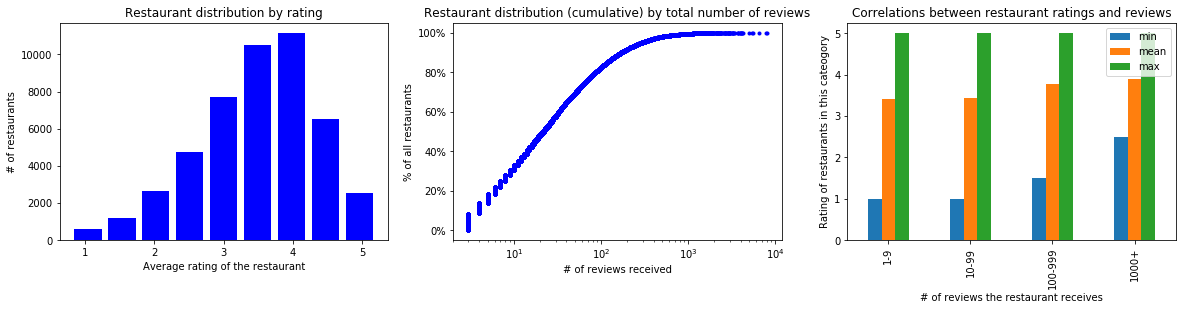

In [19]:
plt.figure(figsize=(20,4))

# restaurant distribution by rating
ax1 = plt.subplot(1,3,1)
business.stars.plot(kind='hist', bins=9, range=(0.8, 5.2), rwidth=0.8, color = 'blue', ax=ax1);
ax1.set_xlabel('Average rating of the restaurant');
ax1.set_ylabel('# of restaurants');
ax1.set_title('Restaurant distribution by rating');

# restaurant distribution by review counts
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    x = np.sort(array)  #sort array to use as the x axis    
    y = np.arange(1, len(array)+1)/len(array) #use np.arange to create the y axis for cdf from 1/len to 1
    return x,y

ax2 = plt.subplot(1,3,2)
x,y = ecdf(business.review_count)
ax2.plot(x, y, marker = '.', linestyle='none',color='blue');
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.set_xscale('log');
ax2.set_xlabel('# of reviews received');
ax2.set_ylabel('% of all restaurants');
ax2.set_title('Restaurant distribution (cumulative) by total number of reviews');

# correlation between rating and review
ax3 = plt.subplot(1,3,3)
count_cat = np.log10(business.review_count)//1
busi_by_rev_count = business.groupby(count_cat)['stars'].agg(['min','mean','max'])
busi_by_rev_count.index = ['1-9','10-99','100-999','1000+']
busi_by_rev_count.plot(kind='bar', ax=ax3);
ax3.set_xlabel('# of reviews the restaurant receives');
ax3.set_ylabel('Rating of restaurants in this cateogory');
ax3.set_title('Correlations between restaurant ratings and reviews');

The plot shows that the majority of the restaurants have a rating between 3.0 and 4.5, with 3.5 and 4.0 being the most common ratings. Half of the restaunrants have less than 30 reviews, although the record number of reviews is as high as 7968. The correlation between ratings and reviews reveals that restaurants with more reviews tend to have higher ratings on average.

#### Restaurant by price

In [20]:
# restaurant statistics by price_range
rest_by_price = business.groupby(business['attributes.RestaurantsPriceRange2'])['business_id','stars','review_count'].agg({'business_id': 'count','stars':'mean','review_count':['mean','max']})
rest_by_price.index = ["$ (low)","$$ (mid)","$$$ (high)","$$$$ (highest)"]
rest_by_price.index.name = 'RestaurantPriceRange'
rest_by_price

business_id     stars review_count      
                           count      mean         mean   max
RestaurantPriceRange                                         
$ (low)                    19450  3.450026    49.021285  4981
$$ (mid)                   19765  3.516848   104.397369  7968
$$$ (high)                  1615  3.557585   172.191331  7866
$$$$ (highest)               320  3.526562   186.746875  3244

In [36]:
# interactive visualization of restaurant statistics by price range and by location

def stats_by_price(doc):
    
    # compute statistics by price range
    by_price = business.groupby('attributes.RestaurantsPriceRange2')
    counts = by_price.business_id.count()
    mean_ratings = by_price.stars.mean()    
    mean_rev_cnts = by_price.review_count.mean()
    max_rev_cnts = by_price.review_count.max()
    prices = ["$ (low)","$$ (mid)","$$$ (high)","$$$$ (highest)"]
    
    source_price = ColumnDataSource(data=dict(prices=prices, y=counts))
    p_price = figure(x_range=prices, height=300, width=500, toolbar_location=None, title='# of restaurants by price range for all states')
    p_price.vbar(x='prices', top='y', bottom=0, width=0.8, source=source_price, line_color=None,
                 fill_color=factor_cmap('prices', palette=Spectral4, factors=prices))
    p_price.xgrid.grid_line_color = None
    p_price.y_range.start = 0
    p_price.yaxis.axis_label = '# of restaurants in all states'
    
    def callback(attr, old, new):
        # update according to 'state' menu
        state = menu_1.value
        if state == "all states": df = business
        else: df = business[business.state == state]
        by_price = df.groupby('attributes.RestaurantsPriceRange2')
        counts = by_price.business_id.count()
        mean_ratings = by_price.stars.mean()    
        mean_rev_cnts = by_price.review_count.mean()
        max_rev_cnts = by_price.review_count.max()
        
        # update according to 'Summary statistics' menu
        stats = menu_2.value
        if stats == "# of restaurants": y = counts
        elif stats == "Average rating": y = mean_ratings
        elif stats == "Average # of reviews": y = mean_rev_cnts
        else: y = max_rev_cnts
        
        source_price.data = dict(prices=prices, y=y)
        p_price.title.text = "{} by price range for {}".format(stats, state)
        p_price.yaxis.axis_label = "{} in {}".format(stats, state)
        
    menu_1 = Select(value='all states', options=['all states','AZ','NV','NC','OH','PA'], title='State')
    menu_1.on_change('value', callback)
    menu_2 = Select(value='# of restaurants', title='Summary statistics',
                    options=['# of restaurants','Average rating','Average # of reviews','Maximum # of reviews'])
    menu_2.on_change('value',callback)
        
    layout = row(p_price, column(menu_1, menu_2))
    doc.add_root(layout)

show(stats_by_price)

<img src="figures/restaurant_by_price_bokeh.png">

As shown, most restaurants are in the low (40.9%) and mid (41.6%) price range, whereas restaurants in the high and highest price ranges only account for 3.4% and 0.67%, respectively. In addition, there are 13.5% of restaurants having missing price range data.<br>
In terms of ratings ('stars'), restaurants in different price ranges have relatively close average ratings of around 3.5. In terms of the # of reviews received ('review_count'), more expensive restaurants tend to receive more reviews on average.<br>
These trends vary by state only to some extent, state-wise trends are in general in agreement with the national trends. 

#### Restaurants by cuisine and style

In [22]:
# extract cuisine and style information from the 'categories' columns

business['cuisine'] = None
business['style'] = None

# define a default list for restaurant cuisines and restaurant styles
cuisines = ['mexican','italian','chinese','japanese','thai','indian','american (new)','american (traditional)',\
            'french','middle eastern','korean','mediterranean','vietnamese','cajun','greek','hawaiian',\
            'asian fusion','vegetarian','vegan','steakhouse','barbeque','sushi bars','tex-mex','specialty food',\
            'gluten-free','coffee & tea','desserts','seafood','ice cream & frozen yogurt','bakeries','beer',\
            'wine & spirits','soup','pizza','hot dogs','burgers','donuts','cupcakes','salad','tacos',\
            'chicken wings','sandwiches','bubble tea','tapas/small plates','shaved ice','bagels','southern',\
            'local flavor','latin american','custom cakes','ethinic food']
styles = ['restaurants','fast food','food stands','street vendors','nightlife','buffets','bars','food trucks',\
          'breakfast & brunch','diners','cocktail bars','pubs','sports bars','wine bars','beer bars',\
          'casinos','juice bars & smoothies','caterers','delis','cafes','lounges','music venues',\
          'performing arts','food delivery services','dive bars','dance clubs','breweries']

for idx, row in business.iterrows():
    if row['categories'] is not np.nan:
        entries = row['categories'].split(',')
        for entry in entries:
            entry = entry.strip().lower()
            if entry in cuisines: 
                if business.loc[idx,'cuisine'] == None: 
                    business.loc[idx,'cuisine'] = entry
                else:
                    business.loc[idx,'cuisine'] += (', ' + entry)
            elif entry in styles:
                if business.loc[idx,'style'] == None:
                    business.loc[idx,'style'] = entry
                else:
                    business.loc[idx,'style'] += (', ' + entry)

business.fillna(value=pd.np.nan, inplace=True) # update None with NaN

In [23]:
# define function for returning top n phrases from a dataframe's column
from collections import Counter

def top_n_from_column(df, col, n):
    """Take a Dataframe and a column name, return the top n phrases (case insensitive) in that column
    Note: column needs to contain a string of phrases separated by comma.
    """
    counter = Counter()
    for idx, row in df.iterrows():
        if row[col] is not np.nan: 
            entries = row[col].split(',')
            for entry in entries:
                entry = entry.strip().lower()
                counter[entry] += 1    
    return counter.most_common(n)

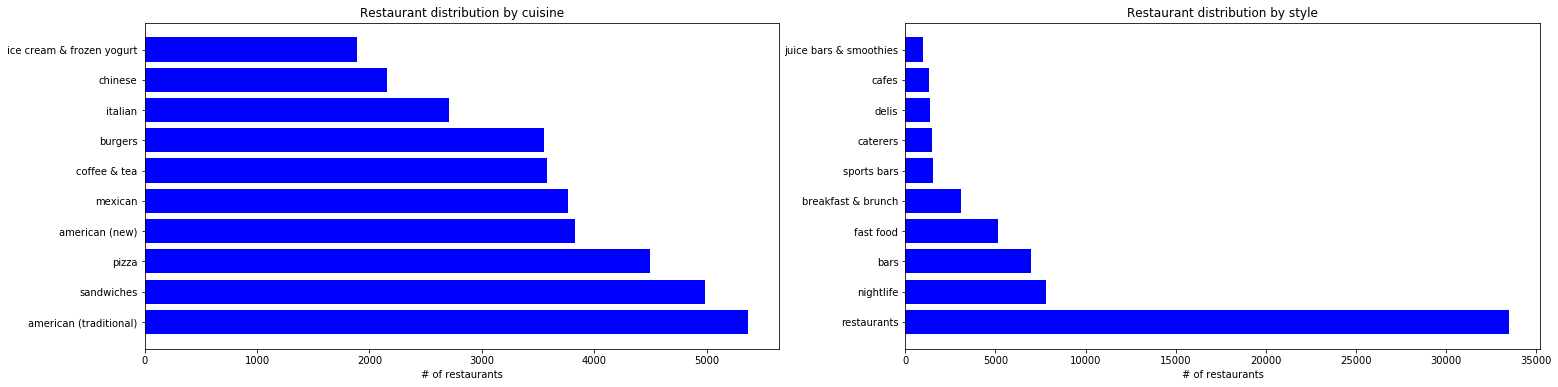

In [24]:
# plot restaurant by cuisine and style

plt.figure(figsize=(25,6))

# restaurant by cuisine
ax1 = plt.subplot(1,2,1)
top_cuisine = top_n_from_column(business, 'cuisine', 10)
ax1.barh(y=[x[0] for x in top_cuisine], width=[x[1] for x in top_cuisine],color='blue');
ax1.set_xlabel('# of restaurants');
ax1.set_title('Restaurant distribution by cuisine');

# restaurant by style
ax2 = plt.subplot(1,2,2)
top_style = top_n_from_column(business,'style', 10)
ax2.barh(y=[x[0] for x in top_style], width=[x[1] for x in top_style],color='blue');
ax2.set_xlabel('# of restaurants');
ax2.set_title('Restaurant distribution by style');

In [37]:
# interactive visualization of restaurant by cuisine and style

def rest_by_category(doc):
    
    top_10 = top_n_from_column(business, 'cuisine', 10)
    cuisines = [i[0] for i in top_10]
    counts = [i[1] for i in top_10]
    source_category = ColumnDataSource(data=dict(counts=counts, y=cuisines))
    p_category = figure(y_range=cuisines, height=300, width=600, toolbar_location=None, 
                        title='Top 10 cuisines for restaurants in all states')
    p_category.hbar(y='y', left=0, right='counts', height=0.8, source=source_category, line_color=None,
                 fill_color=factor_cmap('y', palette=Category20[20], factors=cuisines))
    p_category.ygrid.grid_line_color = None
    p_category.x_range.start = 0
    p_category.xaxis.axis_label = '# of restaurants'
    
    def callback(attr, old, new):      
        state = menu_1.value
        cat = menu_2.value
        n = menu_3.value
        
        # update data according to the new selections
        if state == 'all states': df = business
        else: df = business[business.state == state]
        top_n = top_n_from_column(df, cat, n)
        
        y = [i[0] for i in top_n]
        counts = [i[1] for i in top_n]
        source_category.data = dict(counts=counts, y=y) 
        
        p_category.y_range.factors = y  # update range for the categorical y-axis
        p_category.title.text = "Top {} {} for restaurants in {}".format(n, cat, state)
    
    menu_1 = Select(value='all states', options=['all states','AZ','NV','NC','OH','PA'], title='State')
    menu_1.on_change('value',callback)
    menu_2 = Select(value='cuisine', options=['cuisine','style'], title='Category')
    menu_2.on_change('value',callback)
    menu_3 = Slider(start=5, end=20, step=1, value=10, title='Top n')
    menu_3.on_change('value',callback)
    
    layout = row(p_category, widgetbox(menu_1, menu_2, menu_3))
    doc.add_root(layout)

show(rest_by_category)

<img src="figures/restaurant_by_category_bokeh.png">

As shown, the most popular cuisine among all is American style (traditional and new), followed by Mexican, Italian and Chinese. The most popular restaurant setting is the formal restaurant style, followed by the nightlife/bar style and fast food.<br>
Restaurant trend by cuisine varies quite a bit by location, suggesting people in different states favor different cuisines. The trend by style remains similar among all states.

### 3.2 Understand user pattern

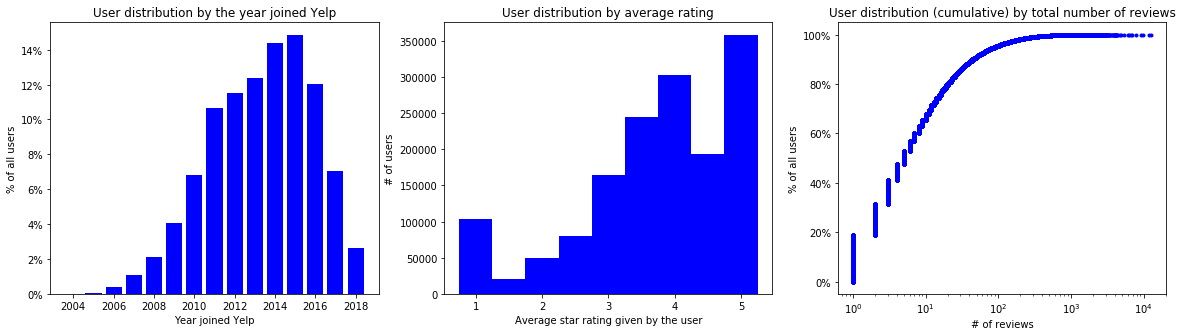

In [44]:
plt.figure(figsize=(20,5))

# user distribution by the year they joined Yelp
import re
yr_joined = user.yelping_since.apply(lambda x: re.findall('^\d{4}',x)[0]).astype(int) # extract the year from the date string
ax1 = plt.subplot(1,3,1)
yr_joined.plot(kind='hist',density=True,bins=15,range=(2003.5,2018.5),rwidth=0.8, color='blue',ax=ax1);
ax1.set_yticklabels(['{:.0%}'.format(x) for x in ax1.get_yticks()])
ax1.set_xlabel('Year joined Yelp');
ax1.set_ylabel('% of all users');
ax1.set_title('User distribution by the year joined Yelp');

# user distribution by average star rating
ax2 = plt.subplot(1,3,2)
user.average_stars.plot(kind='hist',bins=9, range=(0.75,5.25),color='blue',ax=ax2);
ax2.set_xlabel('Average star rating given by the user');
ax2.set_ylabel('# of users');
ax2.set_title('User distribution by average rating');

# user distribution by total number of reviews
x, y = ecdf(user.review_count)
ax3 = plt.subplot(1,3,3)
ax3.plot(x, y, marker = '.', linestyle='none',color='blue');
ax3.set_yticklabels(['{:.0%}'.format(x) for x in ax3.get_yticks()])
ax3.set_xscale('log');
ax3.set_xlabel('# of reviews');
ax3.set_ylabel('% of all users');
ax3.set_title('User distribution (cumulative) by total number of reviews');

As the above plot shows, Yelp witnesses a steady increase of new members since the beginning, and this increase in new users peaks out in 2015, followed by a significant decline afterward. <br>
The average rating given by Yelp users is 3.72. 81% of the users on Yelp are generous with an average rating of 3+.<br> 
Although the record number of reviews a Yelp user has given is 12723, 60% of the users have less than 10 reviews in total, suggesting that most users post reviews on Yelp only occationally.<br>

### 3.3 Understand review and tip

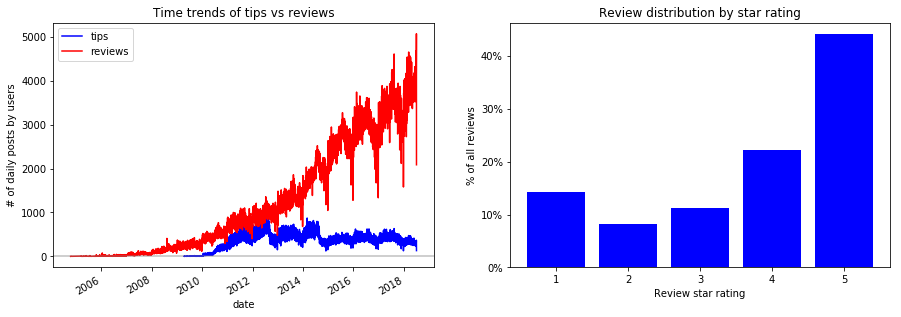

In [27]:
plt.figure(figsize=(15,5))

# plot time trend for daily tips vs daily reviews
ax1 = plt.subplot(1,2,1)
tip['date'] = pd.to_datetime(tip.date, format='%Y-%m-%d')
tip.groupby('date')['text'].count().plot(color='blue', ax=ax1);
review['date'] = pd.to_datetime(review.date, format='%Y-%m-%d')
review.groupby('date')['text'].count().plot(color='red', ax=ax1);

ax1.axhline(y=0, color='grey',alpha=0.5);
ax1.set_ylabel('# of daily posts by users');
ax1.legend(['tips','reviews']);
ax1.set_title('Time trends of tips vs reviews');

# plot review distribution by star rating
ax2 = plt.subplot(1,2,2)
review.stars.plot(kind='hist',density=True, bins=5, range=(0.5,5.5),rwidth=0.8, color='blue', ax=ax2);
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.set_xlabel('Review star rating');
ax2.set_ylabel('% of all reviews');
ax2.set_title('Review distribution by star rating');

As shown, review is one of the earliest feature Yelp has since its beginning, whereas tip is one of the later features introduced in 2009. The popularity of reviews (# of reviews) shows a steady upward trend over time with seasonal fluctuations, whereas the popularity of tips (# of tips) increases in the first four years and slowly dives down afterward. Overall, tip is not as popular as review.<br>
Two thirds of the reviews are associated with a positive star rating of 4+.

### 3.4 Understand checkin

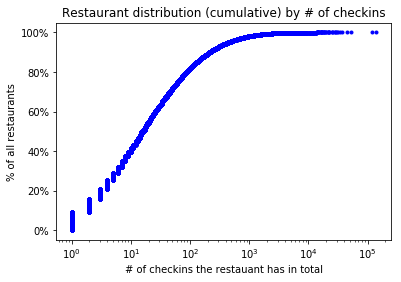

In [29]:
# business distribution by their total number of checkins
x, y = ecdf(checkin.total_count)
ax = plt.subplot()
ax.plot(x, y, marker = '.', linestyle='none', color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.xscale('log');
plt.xlabel('# of checkins the restauant has in total');
plt.ylabel('% of all restaurants');
plt.title('Restaurant distribution (cumulative) by # of checkins');

Half of the restaurants have less than 20 checkins, even less than the reviews, indicating that checkin is not a widely used feature on Yelp. 

## 4. Conclusion

Yelp dataset containing a total of 188,593 businesses, 1,518,169 users, 5,996,996 reviews, 1,185,348 tips, and 157,075 checkins are obtained via Yelp Dataset Challenge, cleaned up, and analyzed here. After data wrangling, there are valid records of 47,553 **US restaurant** businesses, 1,518,168 users, 5,996,995 reviews, 1,185,344 tips, 157,075 checkins. EDA and interactive visualizations are performed to understand restauran patterns, user patterns, review and tip trends, and checkin pattern on Yelp. The important finds are summarized as follows:

#### Restaurant pattern:
This dataset only contains a subset of all yelp businesses, and only a portion of restaurants from 15 states are available. Among them, only Arizona, Nevada, Ohio, North Carolina and Pennsylvania have a rich catalog of over 5000 restaurants, therefore is the main focus of the analysis.<br> 

The most common restaurants are the popular chain or franchised restaurants, fast food or coffee shops. Although the ranking varies by location, Starbucks, McDonald's and Subway are the top 3 among all.<br>

*Rating and review:*<br> 
The majority of the restaurants have a rating between 3.0 and 4.5, with 3.5 and 4.0 being the most common ratings. The average restaurant rating is very similar among five states, close to 3.5. When it comes to reviews, half of the restaunrants have less than 30 reviews, although the record number of reviews is as high as 7968. In addition, the review count a restaurant has received varies by state quite a bit, Nevada has a much higher average than all other states, as a result of the popularity of Las Vegas as a resort town. The correlation between restaurant ratings and reviews reveals that restaurants with more reviews tend to have higher ratings on average.<br>

*Cost:*<br>
Most restaurants are in the low (40.9%) and mid (41.6%) price ranges. Restaurants in different price ranges share similar average ratings of around 3.5, but different review counts. More expensive restaurants tend to receive more reviews on average. This trend varies by state only to some extent.<br>

*Category:*<br>
The most popular cuisine among all is American style (traditional and new), followed by Mexican, Italian and Chinese. The most popular restaurant setting is the formal restaurant style, followed by the nightlife/bar style and fast food.
Restaurant trend by cuisine varies quite a bit by location, suggesting people in different states favor different cuisines. The trend by style remains similar among all states.

#### User pattern:
Yelp witnesses a steady increase of new users since its beginning around 2004, and this increase in new users peaks out in 2015, followed by a significant decline thereafter. The average rating given by Yelp users is 3.72. 81% of the users on Yelp are generous with an average rating of 3+. Although the record number of reviews a Yelp user has given is 12723, 60% of the users have less than 10 reviews in total, suggesting that most users post reviews on Yelp only occationally.

#### Review and tip trend:
Two thirds of the reviews are associated with a positive star rating of 4+. Review $vs.$ Tip: the popularity of reviews (# of reviews) shows a steady upward trend since the beginning in 2004 with seasonal fluctuations, whereas the popularity of tips (# of tips) increases in the first four years after its introduction (2009-2013) and slowly dives down thereafter. Overall, tip is not as popular as review.<br>

#### Checkin: 
Half of the restaurants have less than 20 checkins, even less than the reviews, indicating that checkin is not a widely used feature on Yelp.<br> 